In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [40]:

def graph(df):
    barwidth=1
    edgecolor="white"
    plt.bar(df.Index, df.Malloc, color="#1E2D40", edgecolor=edgecolor, width=barwidth)
    plt.bar(df.Index, df.VectorAdd, bottom=df.Malloc, color="#7897BF", edgecolor=edgecolor, width=barwidth)
    plt.bar(df.Index, df.Memcpy, bottom=df.Malloc + df.VectorAdd, color="#9CB6D9", edgecolor=edgecolor, width=barwidth)
    plt.bar(df.Index, df.Free, bottom=df.Malloc + df.VectorAdd + df.Memcpy, color="#466C8C", edgecolor=edgecolor, width=barwidth)
    plt.legend()
    plt.gcf().set_size_inches(18.5, 10.5)

In [44]:
df = pd.DataFrame()
hardware_type = ["cpu", "gpu", "fpga"]
for hw in hardware_type:
    _df = pd.read_csv("../data/vector_add_{}.csv".format(hw))
    _df["VectorAdd"] = _df["VectorAdd"] / 100
    _df["Type"] = hw.upper()
    _df["Index"] = np.log2(_df["VectorSize"])
    df = df.append(_df)
df.describe()


,Malloc,VectorAdd,Memcpy,Free,VectorSize,Index
count,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,54.000000
mean,6.894649e+08,9.933466e+08,2.298028e+06,9.352585e+04,1.165080e+05,11.500000
std,7.209835e+08,1.113215e+09,8.381638e+06,1.732410e+05,2.629673e+05,5.236843
min,4.083960e+07,1.141239e+07,1.813200e+04,1.440500e+04,8.000000e+00,3.000000
25%,5.054897e+07,1.829321e+07,3.322950e+04,1.673975e+04,1.280000e+02,7.000000
50%,3.120640e+08,6.535598e+08,4.623985e+05,6.209350e+04,3.072000e+03,11.500000
75%,1.615414e+09,1.655309e+09,8.984385e+05,7.529350e+04,6.553600e+04,16.000000
max,2.212271e+09,5.047835e+09,5.468704e+07,1.165398e+06,1.048576e+06,20.000000


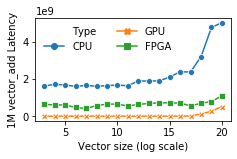

In [107]:

ax = sns.lineplot(data=df, x="Index", y="VectorAdd", hue="Type", style="Type", dashes=False, markers=True)
ax.set(xlabel="Vector size (log scale)", ylabel="1M vector_add Latency")
fig = plt.gcf()
# plt.tight_layout()
ax = plt.gca()
fig.set_size_inches(3.5, 2.1)
fig.subplots_adjust(bottom=0.2)
ax.legend(title=None, loc='upper left', frameon=False, ncol=2)
fig.savefig("vector_add_performance.jpg", dpi=300)
# fig.set_size_inches(16, 10)


No handles with labels found to put in legend.


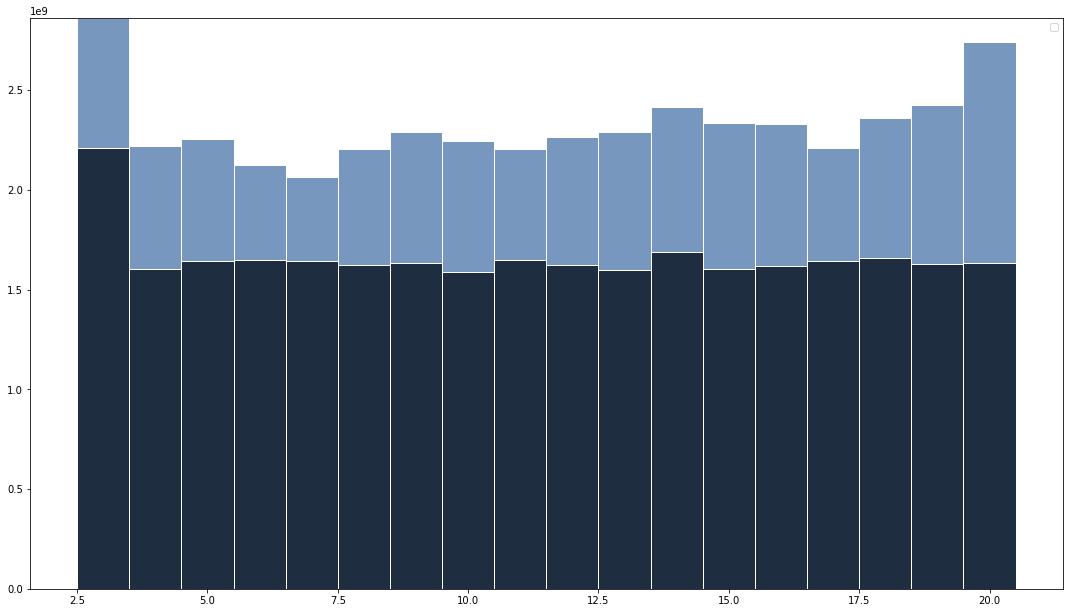

In [46]:
graph(df[df["Type"] == "FPGA"])